# Decision Tree Prediction Model on Credit Card Defaults

#### Created by: Polin Tsenova

Credit cards are used by many worldwide.It is convinient form of payment for goods and services based on the cardholder's promise to the card issuer to return the amounts plus the other agreed charges. The biggest problem that rises up from this type of agreement is that some creditcard holders default on payments. This notebook explores a sourse data of financial institution credit cards, model the data by decision tree algoritm and predicts the possible outcome.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn import tree

### Import Data

In [2]:
creditcard = pd.read_csv('credit_card.csv')

In [3]:
creditcard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Initial Exploration of Data

In [4]:
creditcard.shape

(30000, 25)

In [5]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dpnm         30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [6]:
# Check for missing values
creditcard.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

In [7]:
creditcard.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


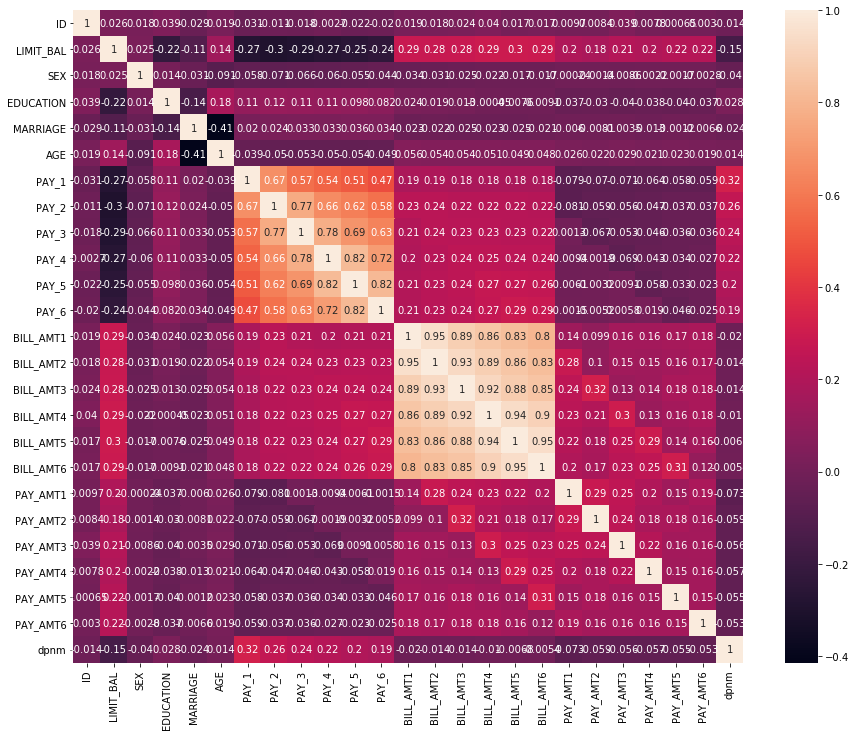

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(creditcard.corr(), annot=True)
plt.show()

### Clean Data

In [9]:
creditcard.drop(['ID'], inplace=True, axis=1)

### Data Analysis

C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


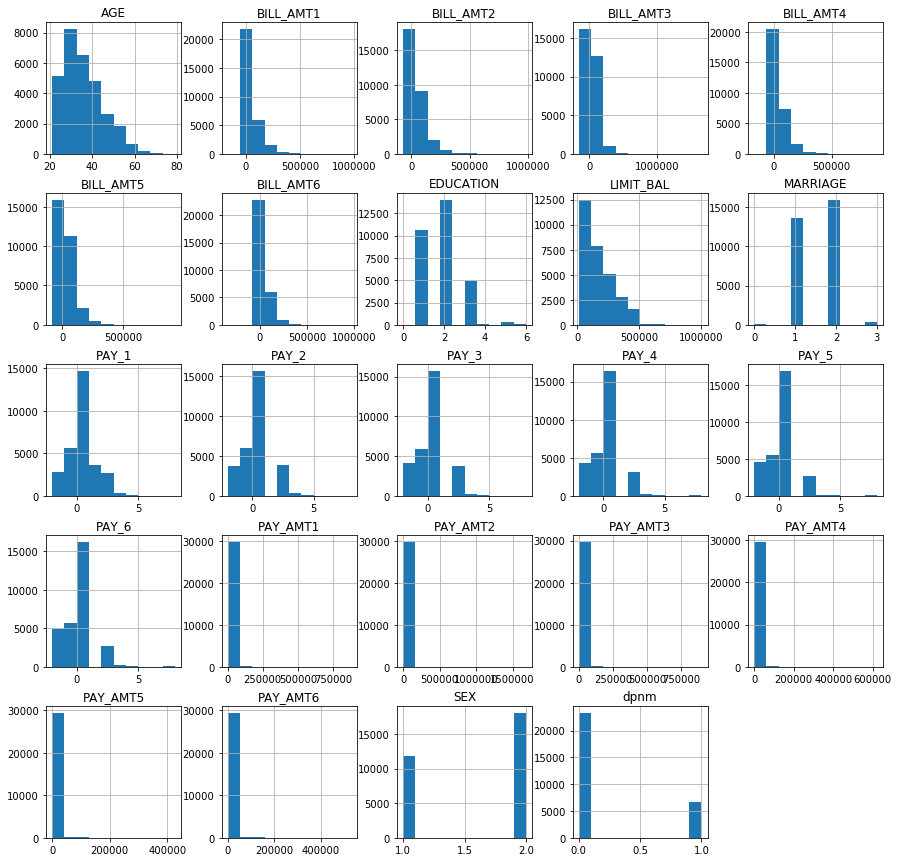

In [10]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
creditcard.hist(ax = ax);
plt.show()

In [11]:
creditcard['dpnm'].value_counts()

0    23364
1     6636
Name: dpnm, dtype: int64

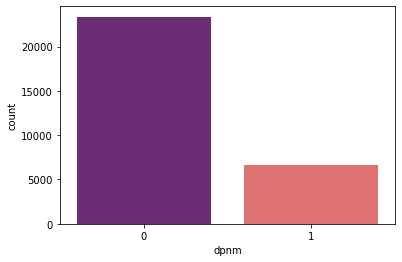

In [12]:
sns.countplot(x='dpnm', data=creditcard, palette='magma')
plt.show()

### Modeling

In [13]:
# Select variavles
x = creditcard.iloc[:, :-1].values
y = creditcard['dpnm'].values

In [14]:
# Splitting the Data into Train and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [15]:
# Create a model
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=3)

In [16]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

### Visualize the tree

<Figure size 1800x1440 with 0 Axes>

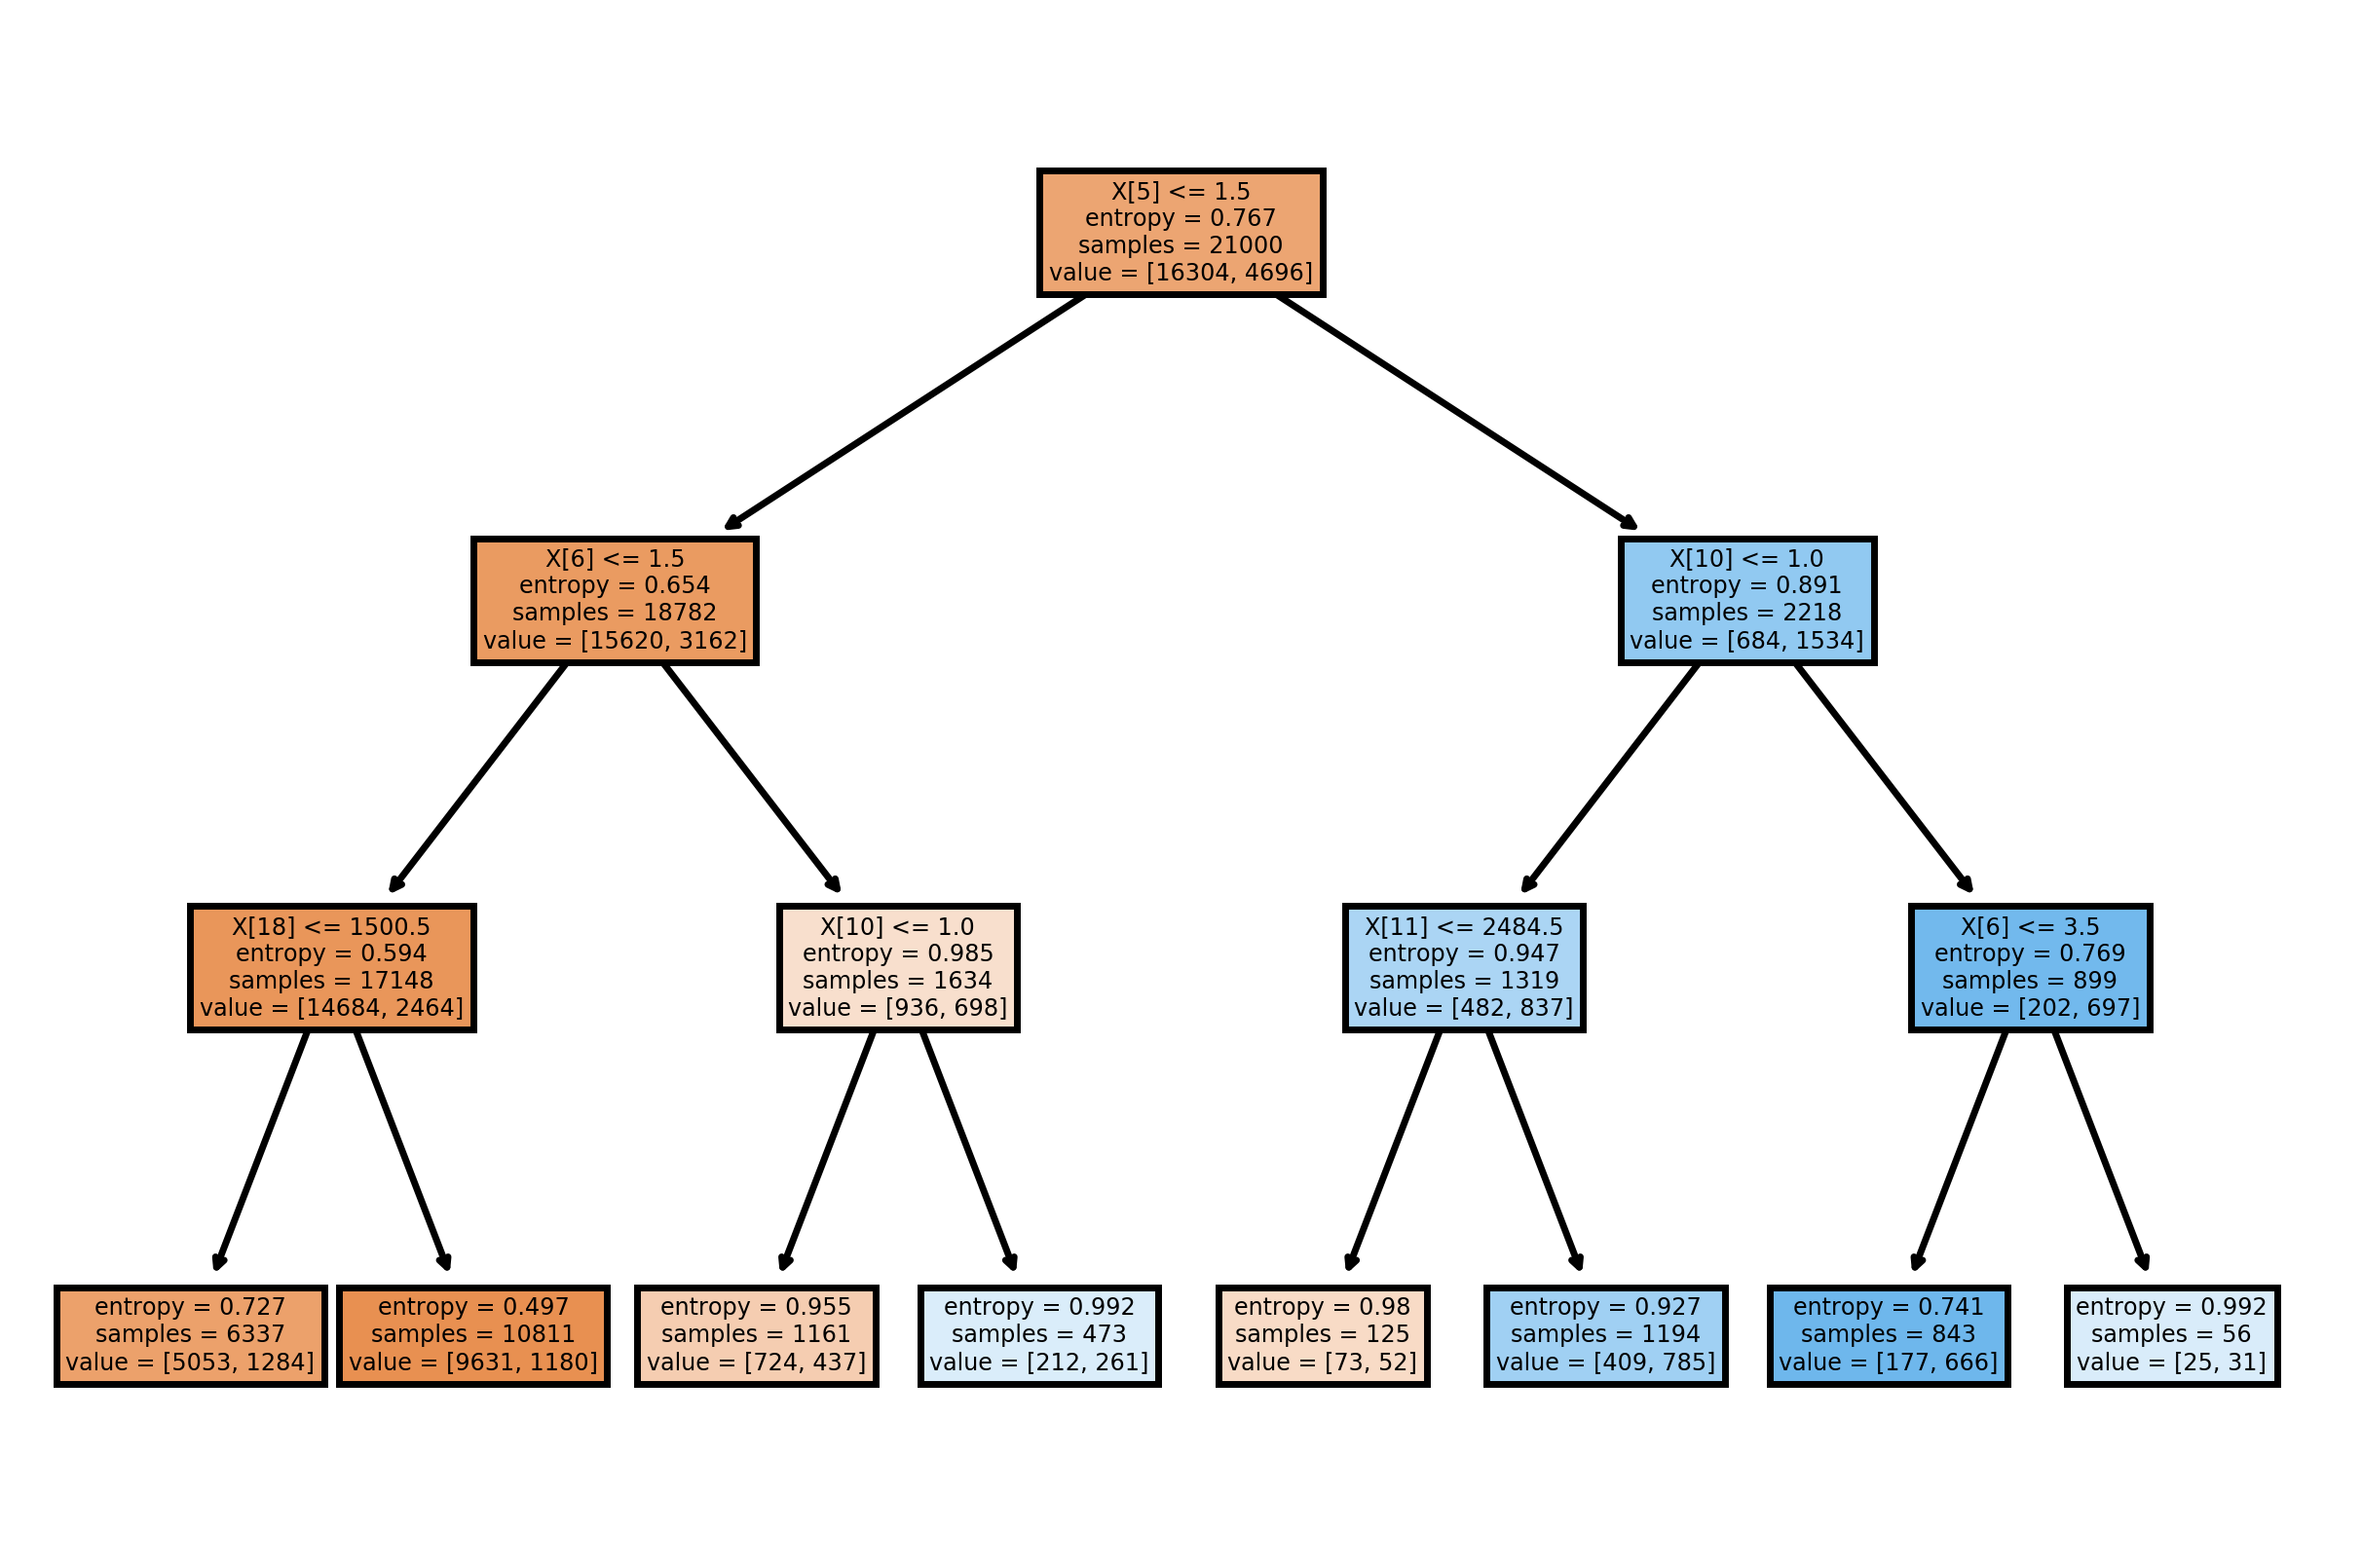

In [17]:
fig = plt.figure(figsize=(25,20))
fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=500)
plot_tree(decision_tree_model,filled = True)
fig.savefig('decision_tree.png')
plt.show()

### Evaluate the model

In [18]:
y_predict = decision_tree_model.predict(x_test)
y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

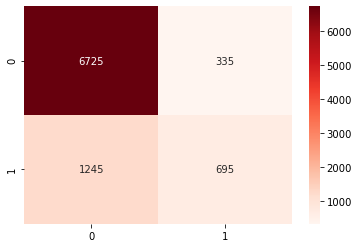

In [19]:
# Build confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.show()

In [20]:
# Checking the accuracy of the model
print("Accuracy is",accuracy_score(y_test, y_predict)*100)

Accuracy is 82.44444444444444


In [21]:
# Check for model overfiting
decision_tree_model2 = decision_tree_model.score(x_train, y_train)
decision_tree_model2 * 100

82.01904761904761

In [22]:
# Report of results
report = classification_report(y_test, y_predict)
print('REPORT:', report, sep='\n')

REPORT:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.67      0.36      0.47      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



### Analysing the results

Decision Tree model was build for predicting default on credit cards.The dataset contains 30000 records, out of which 30% are used for testing. The model predicted correctly 7420 records out of the 9000, which is exactly 82%. A more detailed information of prediction records can be seen in the confusion matrix. Here is a summary of the results:
* 6725 true negative predictions
* 1245 false negative predictions
* 335 false positive prediction
* 695 true positive predictions

Since there is not even a percentage difference between testing and taining prediction accuracy of the model it can be concluded that the model is not overfitting. Prediction accuracy score of the model is not the only indicator for a good model.Precision, sensitivity and F1- score are commonly known indicators for model accuracy. Their value can be taken from the report. Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. In this specific case it is 695 records out of 1030 or 67%. Recall(Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class. In this specific case it is 695 records out of 1940 or 36%. F1-score best reflects the worse case scenario as it takes both false positives and false negatives into account. The closer its value to 1 the better the model. 
